<a href="https://colab.research.google.com/github/ashu017/Iris-Dataset-Classification-using-different-classifiers/blob/master/irisdatasetclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive

In [0]:
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
from sklearn import datasets
iris = datasets.load_iris()

Text(0, 0.5, 'Petal width')

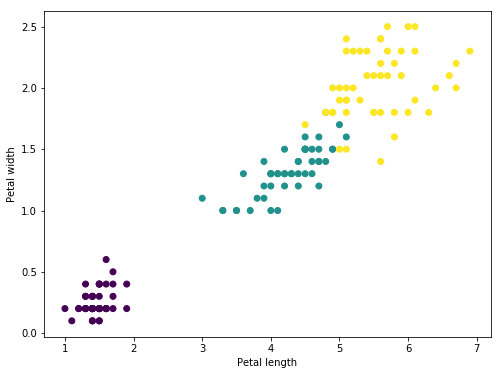

In [0]:
X = iris.data[:,[2,3]]
Y = iris.target
plt.figure(2, figsize=(8, 6))
plt.clf() #clear figure

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

length_Train = len(X_train)
length_Test = len(X_test)

print("There are ",length_Train,"samples in the trainig set and",length_Test,"samples in the test set")
print("-----------------------------------------------------------------------------------------------")
print("")

## 2. Feature scaling.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_standard = sc.transform(X_train)
X_test_standard = sc.transform(X_test)

print("X_train without standardising features")
print("--------------------------------------")
print(X_train[1:5,:])
print("")
print("X_train standardising features")
print("--------------------------------------")
print(X_train_standard[1:5,:])

There are  105 samples in the trainig set and 45 samples in the test set
-----------------------------------------------------------------------------------------------

X_train without standardising features
--------------------------------------
[[5.5 1.8]
 [5.7 2.5]
 [5.  1.5]
 [5.8 1.8]]

X_train standardising features
--------------------------------------
[[0.93066067 0.7372463 ]
 [1.04202177 1.63887031]
 [0.6522579  0.35083601]
 [1.09770233 0.7372463 ]]


In [0]:
from sklearn.linear_model import LogisticRegression

## Initialise the logistc regression model with:
##   C (regularization parameter) = 1000
lr = LogisticRegression(C = 1000.0, random_state = 0 )
lr.fit(X_train_standard, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [0]:
Y_pred_Logit = lr.predict(X_test_standard)
from sklearn.metrics import accuracy_score
print("Accuracy: %.2f" % accuracy_score(Y_test,Y_pred_Logit))

Accuracy: 0.98


In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # Initialise the marker types and colors
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl
                   )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


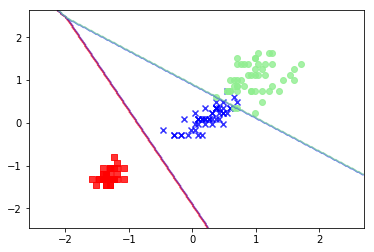

In [0]:
  X_combined_standard = np.vstack((X_train_standard,X_test_standard))
  Y_combined = np.hstack((Y_train, Y_test))
  plot_decision_regions(X = X_combined_standard
                      , y = Y_combined
                      , classifier = lr
                      , test_idx = range(105,150))

In [0]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)
svm.fit(X_train_standard, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
Y_pred_SVM = svm.predict(X_test_standard)

print("Accuracy: %.2f" % accuracy_score(Y_test,Y_pred_SVM))

Accuracy: 0.98


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


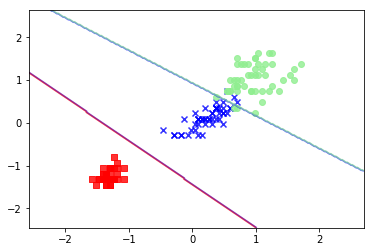

In [0]:
plot_decision_regions(X = X_combined_standard
                      , y = Y_combined
                      , classifier = svm
                      , test_idx = range(105,150))

In [0]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy'
                             , max_depth = 3
                             , random_state = 0)
tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [0]:
Y_pred_tree = tree.predict(X_test)

print("Accuracy: %.2f" % accuracy_score(Y_test,Y_pred_tree))

Accuracy: 0.98


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


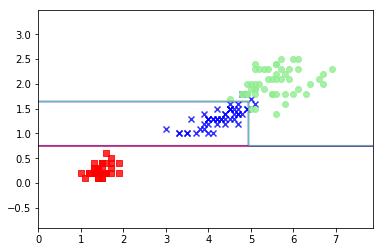

In [0]:
X_combined = np.vstack((X_train, X_test))
Y_combined = np.hstack((Y_train, Y_test))

plot_decision_regions(X = X_combined
                      , y = Y_combined
                      , classifier = tree
                      , test_idx = range(105,150))

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'entropy'
                                , n_estimators = 10
                                , random_state = 1
                                , n_jobs = 1)

forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [0]:
Y_pred_RF = forest.predict(X_test)

print("Accuracy: %.2f" % accuracy_score(Y_test,Y_pred_RF))

Accuracy: 0.96


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


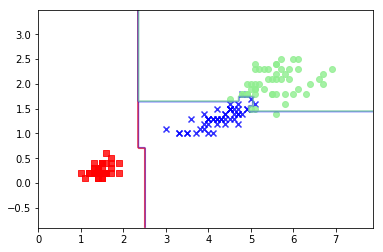

In [0]:
plot_decision_regions(X = X_combined
                      , y = Y_combined
                      , classifier = forest
                      , test_idx = range(105,150))

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5
                          , p=2
                          , metric = 'minkowski')


knn.fit(X_train_standard,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [0]:
Y_pred_KNN = knn.predict(X_test_standard)

print("Accuracy: %.2f" % accuracy_score(Y_test,Y_pred_KNN))

Accuracy: 1.00


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


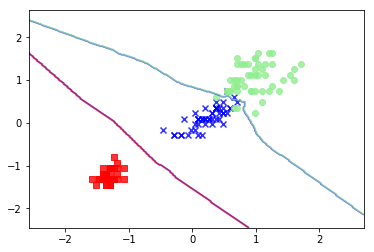

In [0]:
plot_decision_regions(X = X_combined_standard
                      , y = Y_combined
                      , classifier = knn
                      , test_idx = range(105,150))